In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  StandardScaler, normalize
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import math
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
movie_df = pd.read_csv('movie_data.csv')
movie_df

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
0,237000000,en,150.437577,2787965087,107.0,Released,Avatar,7.2,11800,2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087
1,300000000,en,139.082615,961000000,107.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,661000000
2,245000000,en,107.376788,880674609,148.0,Released,Spectre,6.3,4466,2015,10,Action,United Kingdom,Daniel Craig,Columbia Pictures,James Bond,Sam Mendes,635674609
3,250000000,en,112.312950,1084939099,107.0,Released,The Dark Knight Rises,7.6,9106,2012,7,Action,United States of America,Christian Bale,Legendary Pictures,Bruce Wayne / Batman,Christopher Nolan,834939099
4,260000000,en,43.926995,284139100,132.0,Released,John Carter,6.1,2124,2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,27000,en,19.748658,3151130,92.0,Released,Clerks,7.4,755,1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130
3225,12000,en,4.553644,6000000,93.0,Released,Pink Flamingos,6.2,110,1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000
3226,20000,ja,0.212443,99000,111.0,Released,Cure,7.4,63,1997,6,Crime,Japan,Koji Yakusho,Daiei Studios,Kenichi Takabe,Kiyoshi Kurosawa,79000
3227,7000,en,23.307949,424760,77.0,Released,Primer,6.9,658,2004,8,Science Fiction,United States of America,Shane Carruth,Thinkfilm,Aaron,Shane Carruth,417760


In [3]:
movie_df.isnull().sum()

budget                0
original_language     0
popularity            0
revenue               0
runtime               0
status                0
title                 0
vote_average          0
vote_count            0
release_year          0
release_month         0
genre_type            0
production_country    0
lead_name             0
production_company    0
lead_chrctr_name      2
directors             0
profit                0
dtype: int64

In [4]:
movie_df.dropna(inplace=True)

In [5]:
movie_df.isnull().sum()

budget                0
original_language     0
popularity            0
revenue               0
runtime               0
status                0
title                 0
vote_average          0
vote_count            0
release_year          0
release_month         0
genre_type            0
production_country    0
lead_name             0
production_company    0
lead_chrctr_name      0
directors             0
profit                0
dtype: int64

In [6]:
#Average of vote_average
m = movie_df['vote_average'].mean()

In [7]:
m

6.309327548806937

In [8]:
#using for loop created the cluster format of ratings based on good, average nd poor
rating = []
for i in movie_df['vote_average']:
    if (i > m) :
        rating.append('Good')
    elif ((i >= (m/2)) & (i <= m)) :
        rating.append('Average')
    elif (i < (m/2)):
        rating.append('Poor')
movie_df['rating'] = rating

In [9]:
movie_df

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit,rating
0,237000000,en,150.437577,2787965087,107.0,Released,Avatar,7.2,11800,2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087,Good
1,300000000,en,139.082615,961000000,107.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,661000000,Good
2,245000000,en,107.376788,880674609,148.0,Released,Spectre,6.3,4466,2015,10,Action,United Kingdom,Daniel Craig,Columbia Pictures,James Bond,Sam Mendes,635674609,Average
3,250000000,en,112.312950,1084939099,107.0,Released,The Dark Knight Rises,7.6,9106,2012,7,Action,United States of America,Christian Bale,Legendary Pictures,Bruce Wayne / Batman,Christopher Nolan,834939099,Good
4,260000000,en,43.926995,284139100,132.0,Released,John Carter,6.1,2124,2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,27000,en,19.748658,3151130,92.0,Released,Clerks,7.4,755,1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130,Good
3225,12000,en,4.553644,6000000,93.0,Released,Pink Flamingos,6.2,110,1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000,Average
3226,20000,ja,0.212443,99000,111.0,Released,Cure,7.4,63,1997,6,Crime,Japan,Koji Yakusho,Daiei Studios,Kenichi Takabe,Kiyoshi Kurosawa,79000,Good
3227,7000,en,23.307949,424760,77.0,Released,Primer,6.9,658,2004,8,Science Fiction,United States of America,Shane Carruth,Thinkfilm,Aaron,Shane Carruth,417760,Good


In [10]:
movie_df['rating'].value_counts()

Average    1613
Good       1604
Poor         10
Name: rating, dtype: int64

In [11]:
movie_df.status.value_counts()

Released           3226
Post Production       1
Name: status, dtype: int64

In [12]:
movie_df.drop(['status'], axis = 1, inplace=True)

In [13]:
cltsr_df = (movie_df['rating'] == 'Good') | (movie_df['rating'] == 'Average')
cltsr_df = movie_df[cltsr_df]
cltsr_df

,budget,original_language,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit,rating
0,237000000,en,150.437577,2787965087,107.0,Avatar,7.2,11800,2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087,Good
1,300000000,en,139.082615,961000000,107.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,661000000,Good
2,245000000,en,107.376788,880674609,148.0,Spectre,6.3,4466,2015,10,Action,United Kingdom,Daniel Craig,Columbia Pictures,James Bond,Sam Mendes,635674609,Average
3,250000000,en,112.312950,1084939099,107.0,The Dark Knight Rises,7.6,9106,2012,7,Action,United States of America,Christian Bale,Legendary Pictures,Bruce Wayne / Batman,Christopher Nolan,834939099,Good
4,260000000,en,43.926995,284139100,132.0,John Carter,6.1,2124,2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,27000,en,19.748658,3151130,92.0,Clerks,7.4,755,1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130,Good
3225,12000,en,4.553644,6000000,93.0,Pink Flamingos,6.2,110,1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000,Average
3226,20000,ja,0.212443,99000,111.0,Cure,7.4,63,1997,6,Crime,Japan,Koji Yakusho,Daiei Studios,Kenichi Takabe,Kiyoshi Kurosawa,79000,Good
3227,7000,en,23.307949,424760,77.0,Primer,6.9,658,2004,8,Science Fiction,United States of America,Shane Carruth,Thinkfilm,Aaron,Shane Carruth,417760,Good


In [14]:
cltsr_df['rating'].value_counts()

Average    1613
Good       1604
Name: rating, dtype: int64

In [15]:
cp_clstr = cltsr_df.copy()

In [16]:
cltsr_df

,budget,original_language,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit,rating
0,237000000,en,150.437577,2787965087,107.0,Avatar,7.2,11800,2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087,Good
1,300000000,en,139.082615,961000000,107.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,661000000,Good
2,245000000,en,107.376788,880674609,148.0,Spectre,6.3,4466,2015,10,Action,United Kingdom,Daniel Craig,Columbia Pictures,James Bond,Sam Mendes,635674609,Average
3,250000000,en,112.312950,1084939099,107.0,The Dark Knight Rises,7.6,9106,2012,7,Action,United States of America,Christian Bale,Legendary Pictures,Bruce Wayne / Batman,Christopher Nolan,834939099,Good
4,260000000,en,43.926995,284139100,132.0,John Carter,6.1,2124,2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,27000,en,19.748658,3151130,92.0,Clerks,7.4,755,1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130,Good
3225,12000,en,4.553644,6000000,93.0,Pink Flamingos,6.2,110,1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000,Average
3226,20000,ja,0.212443,99000,111.0,Cure,7.4,63,1997,6,Crime,Japan,Koji Yakusho,Daiei Studios,Kenichi Takabe,Kiyoshi Kurosawa,79000,Good
3227,7000,en,23.307949,424760,77.0,Primer,6.9,658,2004,8,Science Fiction,United States of America,Shane Carruth,Thinkfilm,Aaron,Shane Carruth,417760,Good


In [17]:
from tabulate import tabulate
def data_type(df):
    cat=[]
    num=[]
    for col in df:
        if df[col].dtype == 'object':
            cat.append(col)
        else:
            num.append(col)
    return cat,num

cat_var,num_var=data_type(cltsr_df)
print(tabulate({'Categorical':cat_var,'Numerical':num_var},headers=['Categorical','Numerical']))

Categorical         Numerical
------------------  -------------
original_language   budget
title               popularity
genre_type          revenue
production_country  runtime
lead_name           vote_average
production_company  vote_count
lead_chrctr_name    release_year
directors           release_month
rating              profit


In [18]:
#Object to Categorical
for i in cat_var:
    cltsr_df[i]= cltsr_df[i].astype("category")
cltsr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3217 entries, 0 to 3228
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   budget              3217 non-null   int64   
 1   original_language   3217 non-null   category
 2   popularity          3217 non-null   float64 
 3   revenue             3217 non-null   int64   
 4   runtime             3217 non-null   float64 
 5   title               3217 non-null   category
 6   vote_average        3217 non-null   float64 
 7   vote_count          3217 non-null   int64   
 8   release_year        3217 non-null   int64   
 9   release_month       3217 non-null   int64   
 10  genre_type          3217 non-null   category
 11  production_country  3217 non-null   category
 12  lead_name           3217 non-null   category
 13  production_company  3217 non-null   category
 14  lead_chrctr_name    3217 non-null   category
 15  directors           3217 non-null   ca

In [19]:
#label encoding: converting categorical into numerical
for i in cat_var:
    cltsr_df[i] = LabelEncoder().fit_transform(cltsr_df[i])
cltsr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3217 entries, 0 to 3228
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              3217 non-null   int64  
 1   original_language   3217 non-null   int32  
 2   popularity          3217 non-null   float64
 3   revenue             3217 non-null   int64  
 4   runtime             3217 non-null   float64
 5   title               3217 non-null   int32  
 6   vote_average        3217 non-null   float64
 7   vote_count          3217 non-null   int64  
 8   release_year        3217 non-null   int64  
 9   release_month       3217 non-null   int64  
 10  genre_type          3217 non-null   int32  
 11  production_country  3217 non-null   int32  
 12  lead_name           3217 non-null   int32  
 13  production_company  3217 non-null   int32  
 14  lead_chrctr_name    3217 non-null   int32  
 15  directors           3217 non-null   int32  
 16  profit

In [20]:
num_cat = ['int32', 'float64', 'int64']
num_df  = cltsr_df.select_dtypes(include=num_cat)
scaler = StandardScaler()
scale_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scale_df

,budget,original_language,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit,rating
0,4.416765,-0.137271,3.351678,14.297185,-0.097979,-1.458227,1.040391,7.642817,0.551177,0.898386,-1.092296,0.503038,1.170789,-0.511628,-0.208908,-0.466182,15.601836,1.002802
1,5.834567,-0.137271,3.037953,4.500668,-0.097979,0.151027,0.685039,2.486063,0.400764,-0.539908,-0.876095,0.503038,-0.058898,1.230592,-1.242341,-0.643261,3.664011,1.002802
2,4.596804,-0.137271,2.161957,4.069949,2.394920,0.546339,-0.025664,2.462045,1.002414,0.898386,-1.092296,0.426201,-1.014724,-1.368984,-0.194215,1.086852,3.504045,-0.997206
3,4.709328,-0.137271,2.298337,5.165252,-0.097979,0.864096,1.514192,5.739763,0.776795,0.035410,-1.092296,0.503038,-1.143599,-0.282389,-1.307236,-1.248681,4.762684,1.002802
4,4.934376,-0.137271,0.408909,0.871218,1.422081,-0.382160,-0.262565,0.807645,0.776795,0.035410,-1.092296,0.503038,1.433909,1.230592,-0.022793,-1.621983,-0.358674,-0.997206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,-0.916262,-0.137271,-0.259111,-0.635490,-1.010016,-1.164167,1.277291,-0.159423,-0.576916,0.610727,-0.443693,0.503038,-1.347652,0.006453,-0.965616,0.077021,-0.491414,1.002802
3213,-0.916600,-0.137271,-0.678933,-0.620214,-0.949213,0.146718,-0.144114,-0.615054,-2.231451,1.473704,1.285916,0.503038,-0.901958,-1.130575,-0.865211,-0.147917,-0.473324,-0.997206
3214,-0.916420,4.303423,-0.798875,-0.651856,0.145230,-1.091998,1.277291,-0.648255,-0.351297,-0.252249,-0.227492,-0.880036,0.214963,-1.268118,0.151079,0.100951,-0.510648,1.002802
3215,-0.916712,-0.137271,-0.160772,-0.650110,-1.922052,0.194112,0.685039,-0.227944,0.175146,0.323069,2.150721,0.503038,1.270130,0.978429,-1.729670,1.158641,-0.508508,1.002802


In [21]:
corel_matrix = scale_df.corr()
corel_matrix

,budget,original_language,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit,rating
budget,1.000000,-0.063004,0.431301,0.705289,0.245055,0.039305,-0.039920,0.539739,0.267634,0.011090,-0.182452,-0.011371,0.001035,0.058635,-0.008006,-0.011737,0.550130,-0.057384
original_language,-0.063004,1.000000,-0.046591,-0.053750,0.048323,-0.006624,0.069510,-0.055792,0.039280,-0.004669,-0.012824,-0.168274,0.007102,-0.047457,0.008013,0.029101,-0.045632,0.054833
popularity,0.431301,-0.046591,1.000000,0.601639,0.164138,-0.003280,0.287589,0.748675,0.162014,0.011614,-0.029265,0.006390,0.002344,0.056394,0.016400,-0.031191,0.587653,0.206731
revenue,0.705289,-0.053750,0.601639,1.000000,0.215452,0.026833,0.185714,0.755861,0.148049,0.018830,-0.121655,0.048362,0.029840,0.066816,0.004362,-0.020410,0.980005,0.135465
runtime,0.245055,0.048323,0.164138,0.215452,1.000000,0.046953,0.351204,0.245468,-0.065565,0.076530,0.010838,-0.031034,0.014962,-0.010724,-0.015013,0.016401,0.185014,0.282987
title,0.039305,-0.006624,-0.003280,0.026833,0.046953,1.000000,0.031711,0.020482,0.021986,0.021563,0.024078,-0.015854,-0.030502,0.001514,0.056580,-0.011390,0.020576,0.024273
vote_average,-0.039920,0.069510,0.287589,0.185714,0.351204,0.031711,1.000000,0.382421,-0.194302,0.083714,0.067956,0.003059,0.015357,-0.023685,0.012908,-0.011184,0.229967,0.797636
vote_count,0.539739,-0.055792,0.748675,0.755861,0.245468,0.020482,0.382421,1.000000,0.174023,0.004192,-0.062672,0.025152,0.000638,0.045555,0.017474,-0.025509,0.738884,0.276001
release_year,0.267634,0.039280,0.162014,0.148049,-0.065565,0.021986,-0.194302,0.174023,1.000000,-0.049691,-0.014757,-0.114891,-0.013303,-0.102442,0.016940,-0.023161,0.099279,-0.168062
release_month,0.011090,-0.004669,0.011614,0.018830,0.076530,0.021563,0.083714,0.004192,-0.049691,1.000000,0.037189,0.027788,0.019386,-0.005488,0.005837,0.001746,0.019068,0.072509


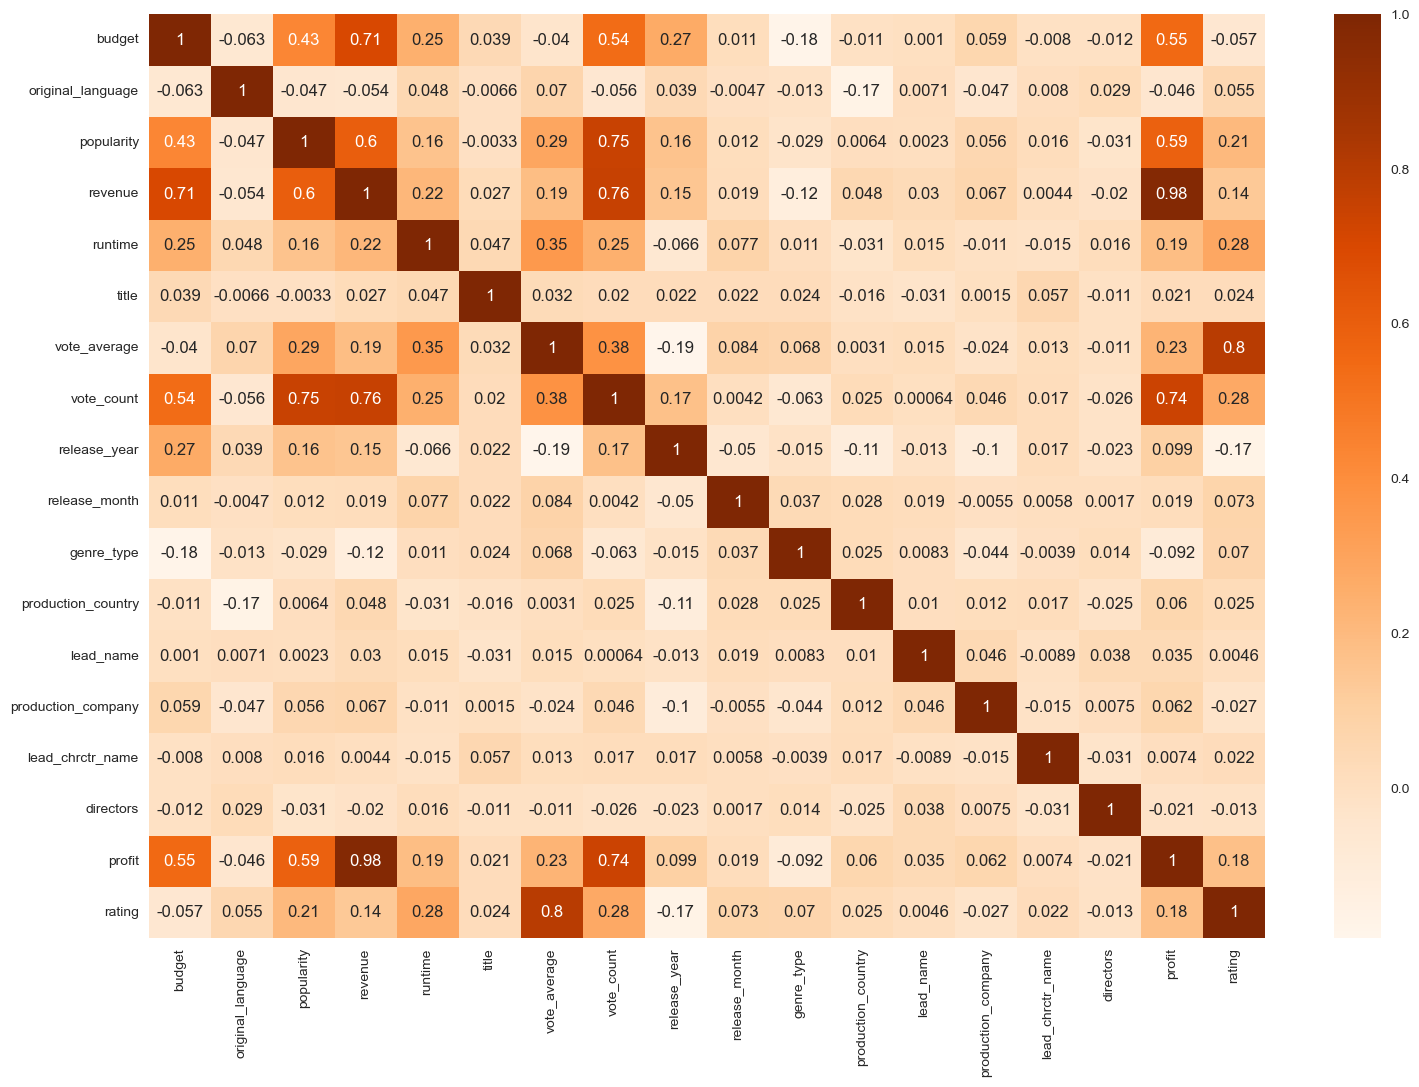

In [22]:
plt.figure(figsize=(18,12))
sns.heatmap(corel_matrix, annot=True, cmap='Oranges')
plt.show()

In [23]:
scale_df.shape

(3217, 18)

### PCA

In [24]:
pca = PCA()
pca.fit_transform(scale_df)
features = range(pca.n_components_)
transformed_data = pca.transform(scale_df)

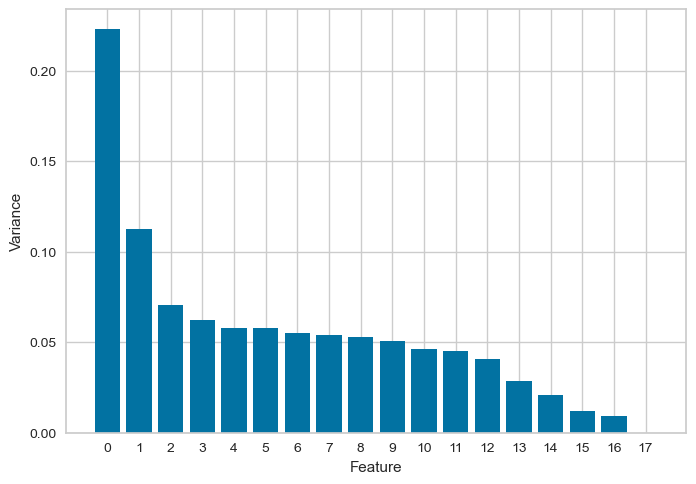

In [25]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

In [26]:
pca2 =  PCA(n_components=2)
transformed_data2 =  pca2.fit_transform(scale_df)
transformed_data2.shape

(3217, 2)

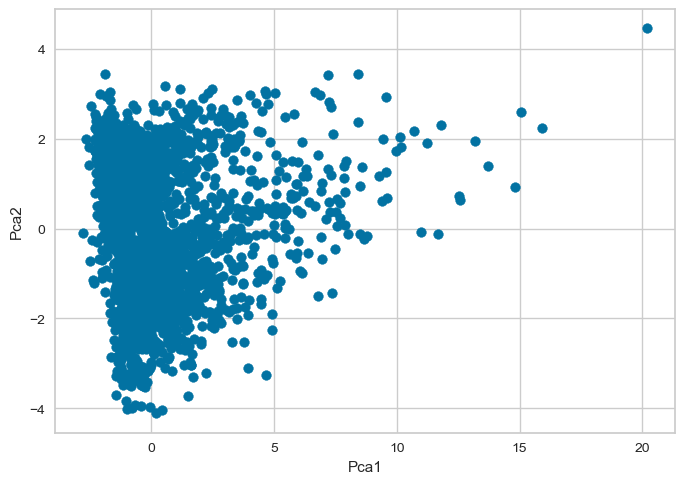

In [27]:
plt.scatter(transformed_data2[:,0], transformed_data2[:,1])
plt.xlabel('Pca1')
plt.ylabel('Pca2')
plt.show()

### KMeans

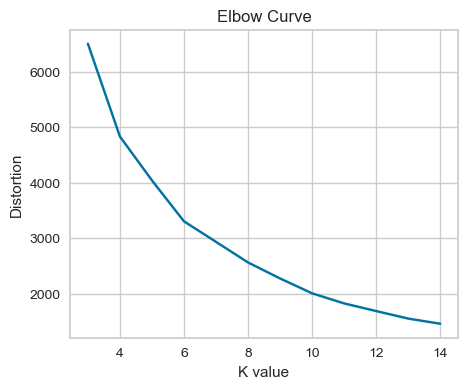

In [28]:
distortion=[]
for i in range(3,15):
    model=KMeans(n_clusters=i).fit(transformed_data2)
    distortion.append(model.inertia_) 
    
plt.figure(figsize=(5,4))
plt.grid(True)
plt.plot(range(3,15),distortion)
plt.ylabel('Distortion')
plt.xlabel('K value')
plt.title("Elbow Curve")
plt.show()

In [29]:
distortion

[6503.1737978956735,
 4833.007188460469,
 4042.9286775245596,
 3306.03925804792,
 2936.7828822106076,
 2565.7112569672627,
 2278.0518846263826,
 2010.2955179441126,
 1828.8511607303385,
 1690.8004065028583,
 1555.5184063167715,
 1462.8968727906702]

In [30]:
for i in range(3,15):
    model=KMeans(n_clusters=i).fit(transformed_data2)
    model.predict(transformed_data2)
    score=silhouette_score(transformed_data2,model.labels_,metric="euclidean")
    print("k:",i,"score",score)

k: 3 score 0.48792999050619223
k: 4 score 0.4937241058902428
k: 5 score 0.46955692805038896
k: 6 score 0.42916449779032495
k: 7 score 0.3970033951396145
k: 8 score 0.37756663465899426
k: 9 score 0.36527570658268627
k: 10 score 0.3563972902554377
k: 11 score 0.3582994285091781
k: 12 score 0.35426624612893026
k: 13 score 0.3556930447357792
k: 14 score 0.3496065968733345


In [31]:
model_km = KMeans(n_clusters = 4).fit(transformed_data2)

In [32]:
print(model_km.labels_)

[3 3 3 ... 2 2 2]


Text(0.5, 1.0, 'KMeans Cluster')

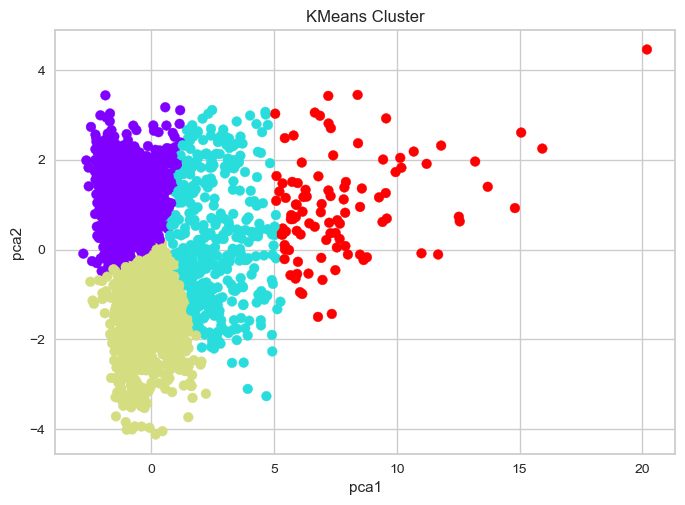

In [33]:
plt.scatter(transformed_data2[:,0],transformed_data2[:,1],c=model_km.labels_,cmap='rainbow')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('KMeans Cluster')

### Hierarchical Clustering

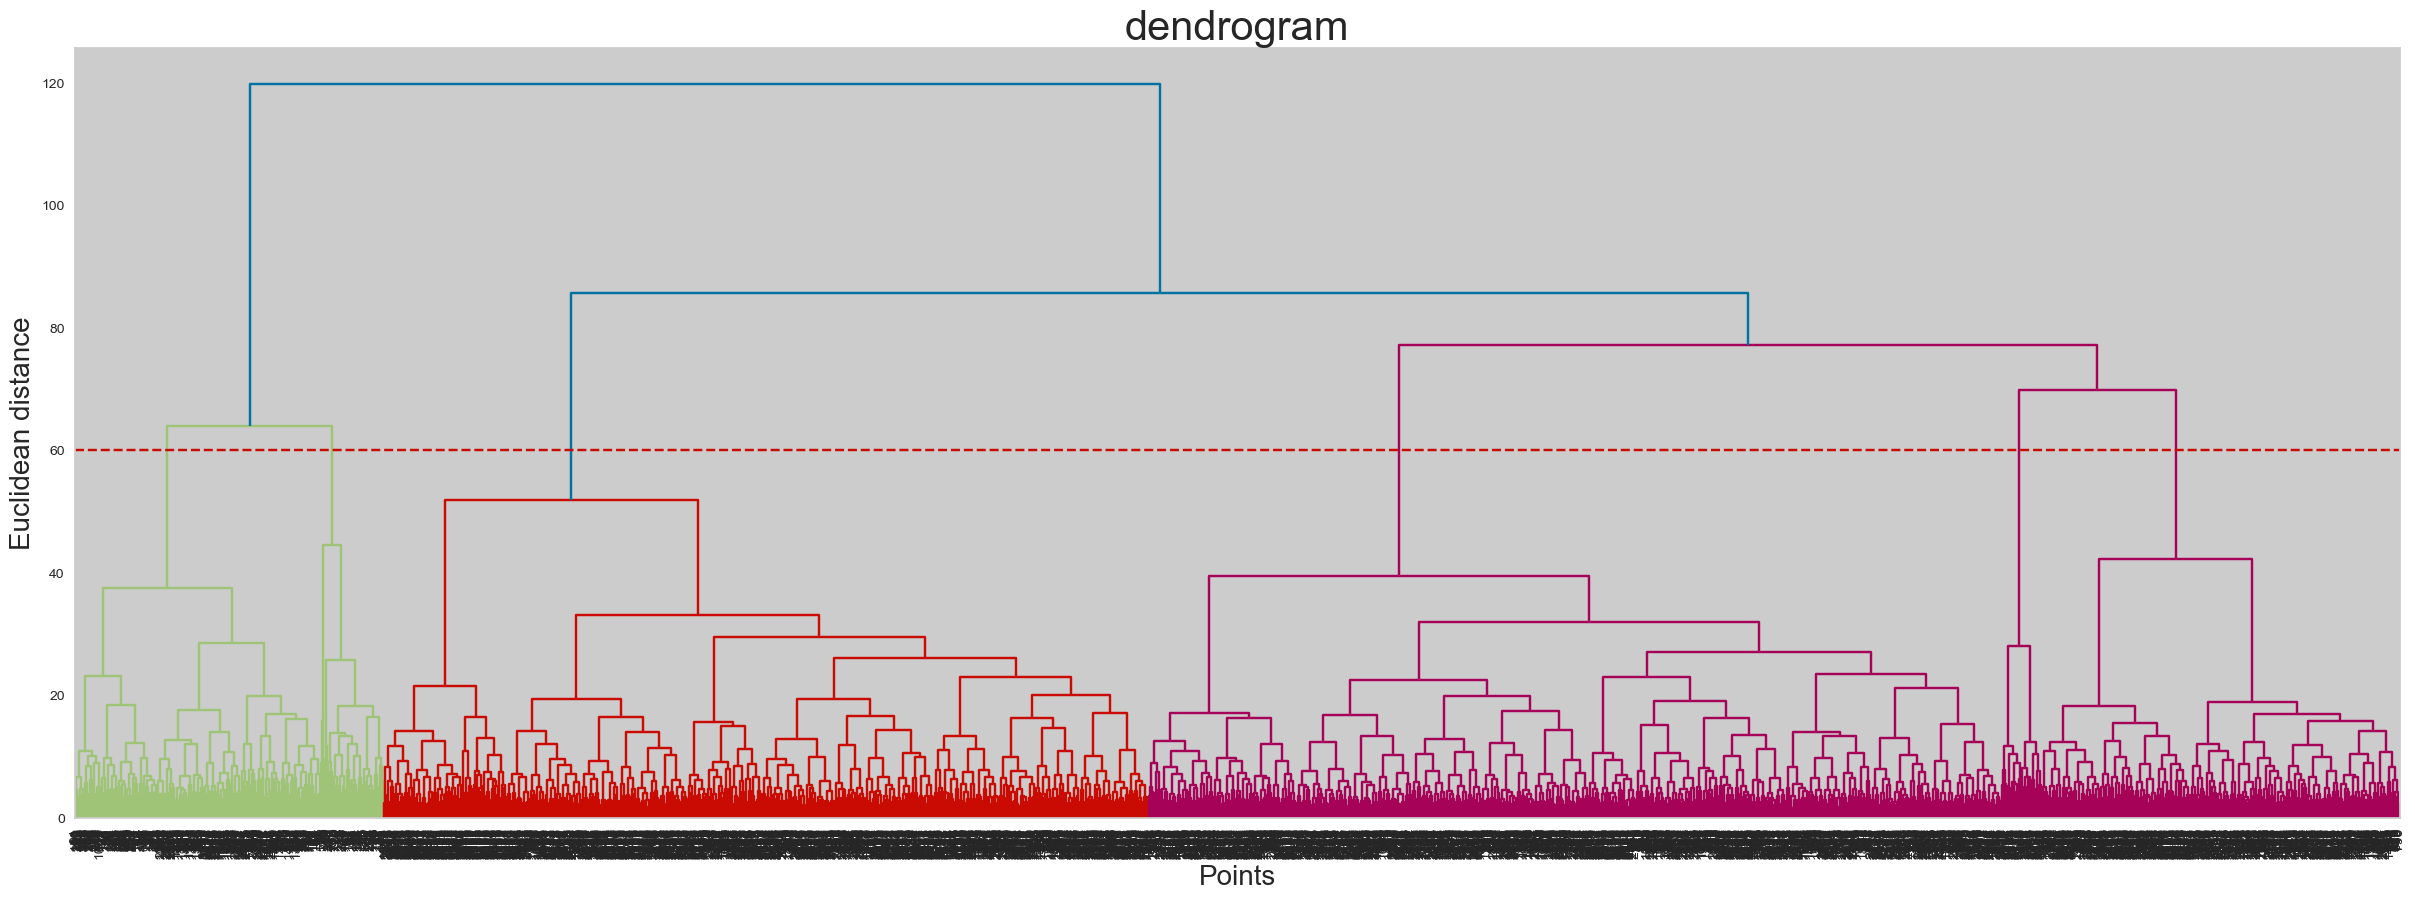

In [34]:
from scipy.cluster.hierarchy import dendrogram,linkage

plt.figure(figsize=(30,10))
dendrogram = dendrogram(linkage(scale_df,method='ward',metric='euclidean'))
plt.axhline(y=60,color='r',linestyle ='--')
ax=plt.gca()
ax.tick_params(axis='x',which='major',labelsize=10)
plt.title('dendrogram',fontsize=30)
plt.xlabel('Points',fontsize=20)
plt.ylabel('Euclidean distance',fontsize=20)
plt.show()

In [35]:
for i in range(3,15):
    amodel=AgglomerativeClustering(n_clusters=i).fit(transformed_data2)
    amodel.fit_predict(transformed_data2)
    score=silhouette_score(transformed_data2,amodel.labels_,metric="euclidean")
    print("k:",i,"score",score)

k: 3 score 0.47057113117137733
k: 4 score 0.4724233575432975
k: 5 score 0.4449739409725443
k: 6 score 0.4442088887055571
k: 7 score 0.34704832301594646
k: 8 score 0.3384639915382475
k: 9 score 0.3045672631571819
k: 10 score 0.3010256617930412
k: 11 score 0.30140464955875257
k: 12 score 0.31266935317758554
k: 13 score 0.31116447198657377
k: 14 score 0.30461689907113104


In [36]:
hc = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')

In [37]:
y_hc = hc.fit_predict(transformed_data2)

In [38]:
y_hc

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

Text(0, 0.5, 'pca2')

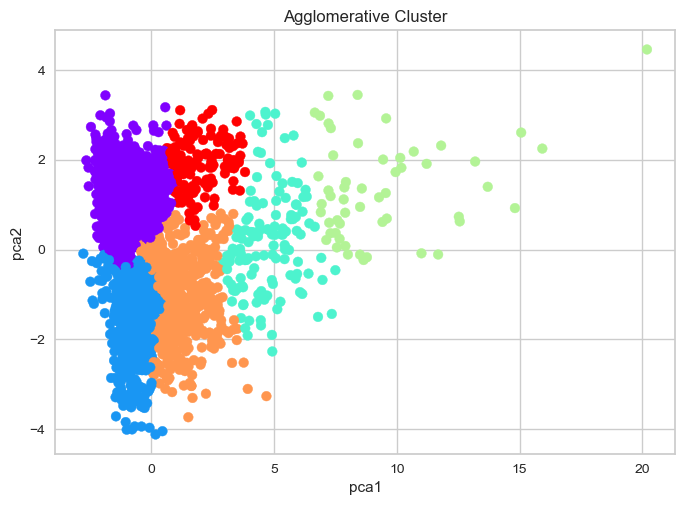

In [39]:
plt.scatter(transformed_data2[:,0],transformed_data2[:,1],c=y_hc, cmap = 'rainbow')
plt.title('Agglomerative Cluster')
plt.xlabel('pca1')
plt.ylabel('pca2')

### DB SCAN

In [40]:
neighbours=NearestNeighbors(n_neighbors=5)
neigh_fit = neighbours.fit(transformed_data2)
distance, index=neigh_fit.kneighbors(transformed_data2)

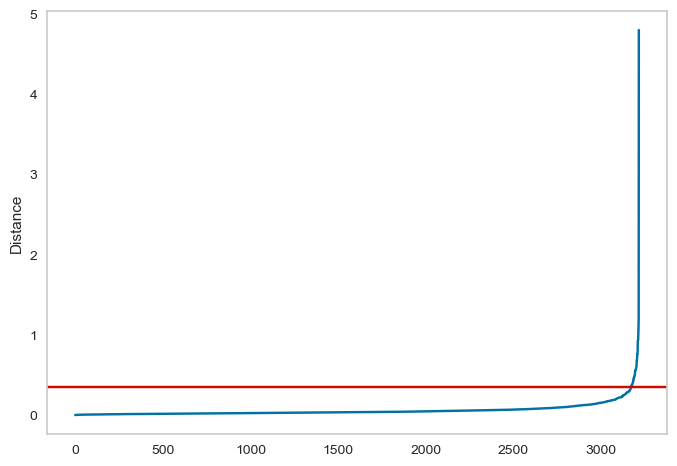

In [41]:
distances=np.sort(distance,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.axhline(y=0.35,color='r')
plt.grid()
plt.ylabel('Distance')
plt.show()

In [42]:
eps=0.35
for i in range(3,15):
    db=DBSCAN(eps=eps,min_samples=i)
    db.fit(transformed_data2)
    labels=db.labels_
    
    new_labels=labels+2
    y=np.bincount(new_labels)
    z=np.nonzero(y)[0]
    cluster=list(zip(z,y[z]))
    print('min_sample:',i,'cluster:',cluster)
    score=silhouette_score(transformed_data2,new_labels,metric='euclidean')
    print(f'score = {score}')
    print(' ')

min_sample: 3 cluster: [(1, 73), (2, 3), (3, 3091), (4, 6), (5, 5), (6, 14), (7, 4), (8, 3), (9, 3), (10, 7), (11, 8)]
score = -0.020262399229637202
 
min_sample: 4 cluster: [(1, 94), (2, 3083), (3, 5), (4, 5), (5, 11), (6, 4), (7, 6), (8, 4), (9, 5)]
score = 0.24576007143013304
 
min_sample: 5 cluster: [(1, 125), (2, 3070), (3, 8), (4, 9), (5, 5)]
score = 0.3417540946239785
 
min_sample: 6 cluster: [(1, 139), (2, 3053), (3, 10), (4, 7), (5, 8)]
score = 0.3443581638089898
 
min_sample: 7 cluster: [(1, 153), (2, 3034), (3, 8), (4, 7), (5, 7), (6, 8)]
score = 0.344609526276769
 
min_sample: 8 cluster: [(1, 181), (2, 49), (3, 2955), (4, 15), (5, 8), (6, 3), (7, 6)]
score = 0.11364337897802024
 
min_sample: 9 cluster: [(1, 211), (2, 46), (3, 2936), (4, 13), (5, 11)]
score = 0.3620100222758827
 
min_sample: 10 cluster: [(1, 258), (2, 22), (3, 21), (4, 2901), (5, 8), (6, 7)]
score = 0.2536768795750596
 
min_sample: 11 cluster: [(1, 278), (2, 14), (3, 20), (4, 2884), (5, 6), (6, 8), (7, 7)]
s

In [43]:
db=DBSCAN(eps=eps,min_samples=8)
db.fit(transformed_data2)
labels=db.labels_

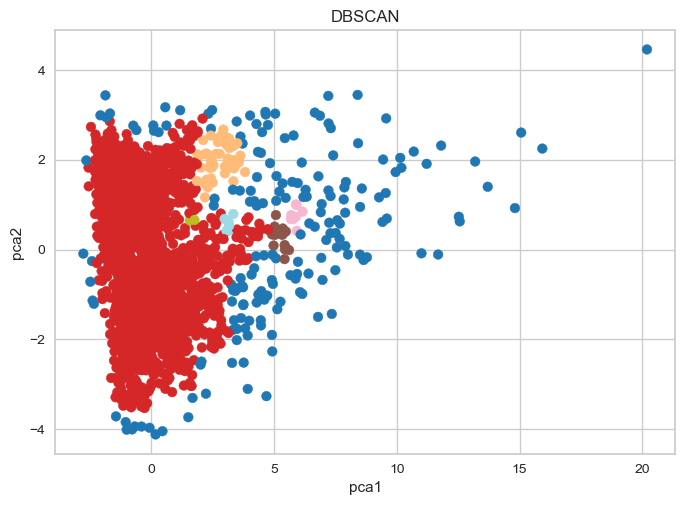

In [44]:
plt.scatter(transformed_data2[:,0],transformed_data2[:,1],c=labels,cmap='tab20')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('DBSCAN')
plt.show()

In [45]:
labels

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

In [46]:
Kmscore=silhouette_score(transformed_data2,model_km.labels_,metric='euclidean')
Hiscore=silhouette_score(transformed_data2,hc.labels_,metric='euclidean')
DBscore=silhouette_score(transformed_data2,db.labels_,metric='euclidean')
print('Silhoute scores')
print('--'*30)
print('Kmean      : ',Kmscore)
print('Hirachical : ',Hiscore)
print('DBSCAN     : ',DBscore)

Silhoute scores
------------------------------------------------------------
Kmean      :  0.4937241058902428
Hirachical :  0.4442088887055571
DBSCAN     :  0.11364337897802024


In [47]:
model_list=["KMeans Clustering","Hierarchical Clustering","DBSCAN Clustering"]
metric_list=[0.4946960506390134, 0.4794070370582491, 0.09666656582328241]

In [48]:
total_score = pd.DataFrame(columns=("Models", "silhouette scores"))

In [49]:
total_score['Models'] = model_list

In [50]:
total_score['silhouette scores'] = metric_list

In [51]:
total_score

,Models,silhouette scores
0,KMeans Clustering,0.494696
1,Hierarchical Clustering,0.479407
2,DBSCAN Clustering,0.096667


In [52]:
a = model_km.labels_
a

array([3, 3, 3, ..., 2, 2, 2])

In [53]:
cp_clstr['Clusters'] = a

In [54]:
cp_clstr

,budget,original_language,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit,rating,Clusters
0,237000000,en,150.437577,2787965087,107.0,Avatar,7.2,11800,2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087,Good,3
1,300000000,en,139.082615,961000000,107.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,661000000,Good,3
2,245000000,en,107.376788,880674609,148.0,Spectre,6.3,4466,2015,10,Action,United Kingdom,Daniel Craig,Columbia Pictures,James Bond,Sam Mendes,635674609,Average,3
3,250000000,en,112.312950,1084939099,107.0,The Dark Knight Rises,7.6,9106,2012,7,Action,United States of America,Christian Bale,Legendary Pictures,Bruce Wayne / Batman,Christopher Nolan,834939099,Good,3
4,260000000,en,43.926995,284139100,132.0,John Carter,6.1,2124,2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100,Average,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,27000,en,19.748658,3151130,92.0,Clerks,7.4,755,1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130,Good,2
3225,12000,en,4.553644,6000000,93.0,Pink Flamingos,6.2,110,1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000,Average,2
3226,20000,ja,0.212443,99000,111.0,Cure,7.4,63,1997,6,Crime,Japan,Koji Yakusho,Daiei Studios,Kenichi Takabe,Kiyoshi Kurosawa,79000,Good,2
3227,7000,en,23.307949,424760,77.0,Primer,6.9,658,2004,8,Science Fiction,United States of America,Shane Carruth,Thinkfilm,Aaron,Shane Carruth,417760,Good,2


In [55]:
cp_clstr['Clusters'].value_counts()

0    1445
2    1270
1     401
3     101
Name: Clusters, dtype: int64

In [56]:
clust_0 = cp_clstr[cp_clstr['Clusters'] == 0] 

In [57]:
clust_1 = cp_clstr[cp_clstr['Clusters'] == 1] 

In [58]:
clust_1

,budget,original_language,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit,rating,Clusters
4,260000000,en,43.926995,284139100,132.0,John Carter,6.1,2124,2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100,Average,1
10,270000000,en,57.925623,391081192,154.0,Superman Returns,5.4,1400,2006,6,Adventure,United States of America,Brandon Routh,DC Comics,Superman / Clark Kent,Bryan Singer,121081192,Average,1
11,200000000,en,107.928811,586090727,106.0,Quantum of Solace,6.1,2965,2008,10,Adventure,United Kingdom,Daniel Craig,Eon Productions,James Bond,Marc Forster,386090727,Average,1
13,255000000,en,49.046956,89289910,149.0,The Lone Ranger,5.9,2311,2013,3,Action,United States of America,Johnny Depp,Walt Disney Pictures,Tonto,Gore Verbinski,-165710090,Average,1
15,225000000,en,53.978602,419651413,150.0,The Chronicles of Narnia: Prince Caspian,6.3,1630,2008,5,Adventure,Czech Republic,Ben Barnes,Walt Disney,Prince Caspian,Andrew Adamson,194651413,Average,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,12000000,en,74.358971,307166834,125.0,The Fault in Our Stars,7.6,3759,2014,5,Romance,United States of America,Shailene Woodley,Fox 2000 Pictures,Hazel Grace Lancaster,Josh Boone,295166834,Good,1
2426,10500000,en,56.105798,792910554,115.0,E.T. the Extra-Terrestrial,7.3,3269,1982,3,Science Fiction,United States of America,Henry Thomas,Universal Pictures,Elliott,Steven Spielberg,782410554,Good,1
2573,8000000,en,121.463076,213928762,154.0,Pulp Fiction,8.3,8428,1994,8,Thriller,United States of America,John Travolta,Miramax Films,Vincent Vega,Quentin Tarantino,205928762,Good,1
2630,6000000,en,143.659698,245066411,107.0,The Godfather,8.4,5893,1972,3,Drama,United States of America,Marlon Brando,Paramount Pictures,Don Vito Corleone,Francis Ford Coppola,239066411,Good,1


In [74]:
#rating feature has good,
#nd the average values
#value_counts -> give us the,
#unique value count in that,
# particular feature.
clust_0.rating.value_counts()

Average    1440
Good          5
Name: rating, dtype: int64

In [72]:
clust_1.rating.value_counts()

Good       276
Average    125
Name: rating, dtype: int64

In [73]:
clust_2.rating.value_counts()

Good       1233
Average      37
Name: rating, dtype: int64

In [75]:
clust_3.rating.value_counts()

Good       90
Average    11
Name: rating, dtype: int64

In [59]:
clust_2 = cp_clstr[cp_clstr['Clusters'] == 2] 

In [60]:
clust_2

,budget,original_language,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit,rating,Clusters
96,15000000,ja,9.476999,77000000,120.0,Shin Godzilla,6.5,143,2016,7,Action,Japan,Hiroki Hasegawa,Cine Bazar,Rando Yaguchi : Deputy Chief Cabinet Secretary,Hideaki Anno,62000000,Good,2
244,110000000,en,23.657284,215294342,107.0,The Patriot,6.8,1099,2000,6,Drama,Germany,Mel Gibson,Centropolis Entertainment,Benjamin Martin,Roland Emmerich,105294342,Good,2
248,116000000,en,45.616098,102000000,107.0,The Aviator,7.0,1489,2004,12,Drama,United States of America,Leonardo DiCaprio,Miramax Films,Howard Hughes,Martin Scorsese,-14000000,Good,2
262,107000000,en,18.866672,87713825,157.0,Ali,6.7,447,2001,11,Drama,United States of America,Will Smith,Columbia Pictures Corporation,Cassius Clay,Michael Mann,-19286175,Good,2
285,100000000,en,46.727941,100138851,91.0,The Hunchback of Notre Dame,6.8,1129,1996,6,Drama,United States of America,Tom Hulce,Walt Disney Pictures,Quasimodo (voice),Gary Trousdale,138851,Good,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,27000,en,19.748658,3151130,92.0,Clerks,7.4,755,1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130,Good,2
3225,12000,en,4.553644,6000000,93.0,Pink Flamingos,6.2,110,1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000,Average,2
3226,20000,ja,0.212443,99000,111.0,Cure,7.4,63,1997,6,Crime,Japan,Koji Yakusho,Daiei Studios,Kenichi Takabe,Kiyoshi Kurosawa,79000,Good,2
3227,7000,en,23.307949,424760,77.0,Primer,6.9,658,2004,8,Science Fiction,United States of America,Shane Carruth,Thinkfilm,Aaron,Shane Carruth,417760,Good,2


In [61]:
clust_2.original_language.value_counts()

en    1171
fr      20
es      12
ja      10
zh       9
de       8
it       5
hi       5
ko       4
cn       4
ru       3
da       3
nl       2
id       2
pt       2
ro       1
af       1
he       1
pl       1
xx       1
nb       1
th       1
is       1
te       1
fa       1
Name: original_language, dtype: int64

In [62]:
clust_2.runtime.mean()

112.18740157480315

In [63]:
clust_2.vote_average.mean()

6.944015748031489

In [64]:
clust_2.genre_type.mode()

0    Drama
Name: genre_type, dtype: object

In [65]:
clust_2.lead_name.mode()

0    Robert De Niro
Name: lead_name, dtype: object

In [66]:
clust_2.budget.max()

140000000

In [67]:
clust_2.directors.mode()

0    Clint Eastwood
Name: directors, dtype: object

In [68]:
clust_2.release_month.value_counts()

12    182
9     143
10    114
11    111
5     105
6     104
7     102
1     102
8      88
2      81
3      70
4      68
Name: release_month, dtype: int64

In [69]:
clust_3 = cp_clstr[cp_clstr['Clusters'] == 3] 

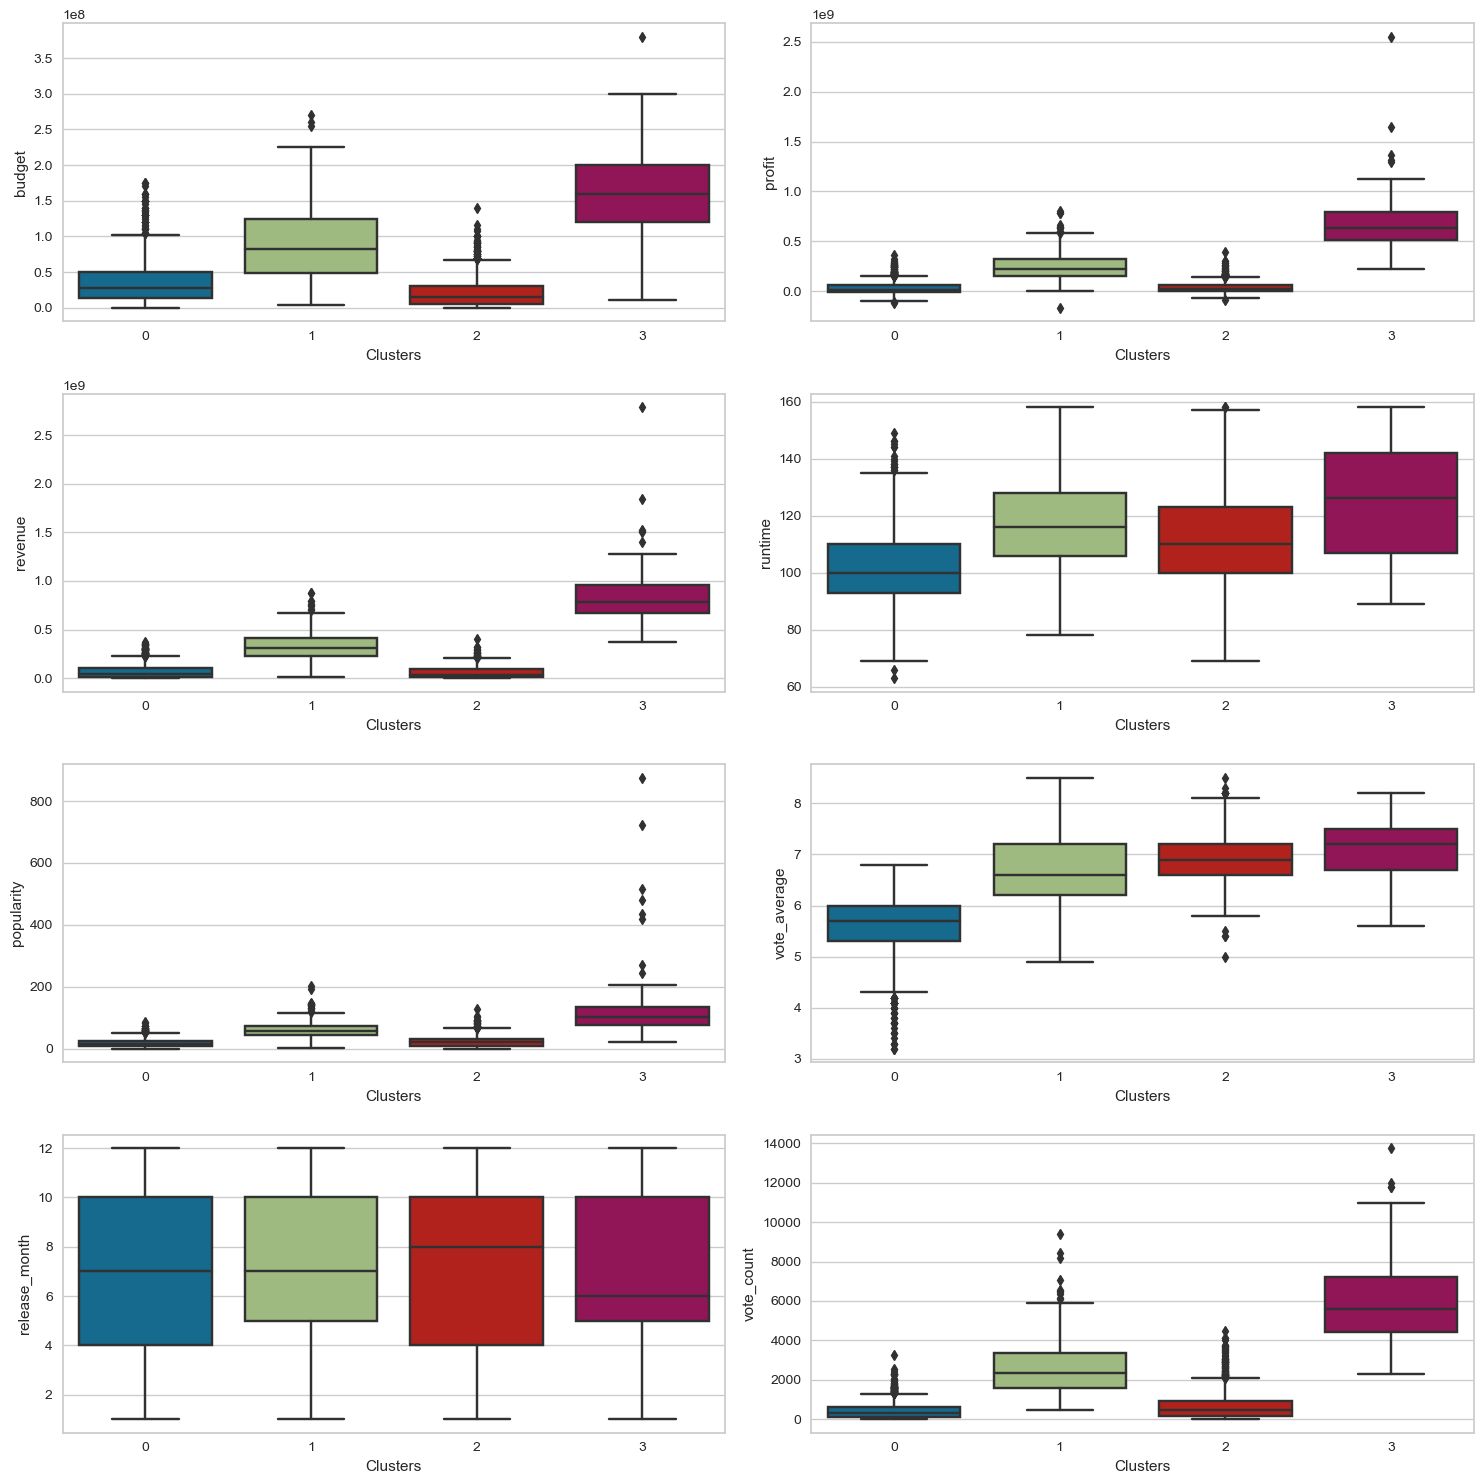

In [70]:
cols = ['budget', 'profit', 'revenue', 'runtime', 'popularity','vote_average','release_month','vote_count']
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

for i, ax in zip(cols, axes.flatten()):
    sns.boxplot(y=cp_clstr[i], x=cp_clstr['Clusters'], ax=ax)

plt.tight_layout()
plt.show()


**As per the KMeans 4 Clusters were formed and ‘Cluster 2’ performance tops in regards to budget, revenue, profit, and runtime features.**

**Totally 101 records fall under the cluster 2 category where the language of the films is English.**

**The average runtime of these movies is 124 mins, with an average vote of 7.09.**

**Most of the films in the cluster2 genre are “Action”.**

**‘Daniel Radcliffe’ is the most repeated actor in this cluster, and ‘Peter  Jackson’ is the repeated director.**

**The maximum budget is $ 380 m.**

**Most movies are released in the month of June (count - 21), followed by May (count - 18).**